In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import ndarray
from matplotlib import pyplot as plt

In [2]:
Data = pd.read_excel('Brand_Data.xlsx')

In [3]:
Data.columns

Index(['Products', 'Volume', 'Turnover', 'Assessment'], dtype='object')

In [ ]:
Data.head()

## Log10 Transformation

<p> 1. Enable the below greyed code to get the exponential of zeros with Log10 </p>

In [6]:
def variable(row):
    x = row['Volume']
#     y = min(x)

#     if (x==0):
#         return np.exp(x)
    if (x>=0):
        return np.log10(x)
    else:
        return np.log10(abs(x+1)-min([x]))

Data['log10'] = Data.apply(variable, axis=1)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


<p> 1. log10 will be used when we have Substantially positive skewness (with zero values) <br>
    2. By using log10 we can transform only -ve and +ve values.
    </p>
    

In [25]:
Data.head()

,Products,Volume,Turnover,Assessment,log10,Cubic
0,Glade,1.513688,10,Right Data,0.180036,1.148186
1,Febreze,-5.515225,20,Invalid Data,1.001320,-1.766801
2,Air Wick,-1.818258,30,Invalid Data,0.421030,-1.220539
3,Renuzit,1.655868,40,Right Data,0.219026,1.183065
4,Great Value,1.518825,50,Right Data,0.181508,1.149483


Skew of explog: nan
skew of Volume: -1.3805295881220825


C:\Anaconda\lib\site-packages\scipy\stats\stats.py:942: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - np.expand_dims(np.mean(a, axis), axis)


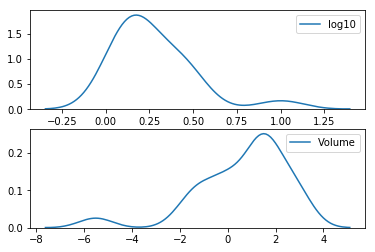

In [24]:
plt.subplot(211)
sns.kdeplot(Data['log10'])
plt.subplot(212)
sns.kdeplot(Data.Volume)

print('Skew of explog:', skew(Data['log10']))
print('skew of Volume:', skew(Data.Volume))

## Cubic Transformation : Manual

In [41]:
# Python 3 program to find cubic root 
# of a number using Binary Search 

# Returns the absolute value of 
# n-mid*mid*mid 
def diff(n, mid) : 
    if (n > (mid * mid * mid)) : 
        return (n - (mid * mid * mid)) 
    else : 
        return ((mid * mid * mid) - n) 

# Returns cube root of a no n 
def cubicRoot(row) : 

    # Set start and end for binary 
    # search 
    start = min(Data.Volume)
    end = max(Data.Volume) 
    n = row['Volume']
    # Set precision 
    e = 0.0000001
    while (True) : 

        mid = (start + end) / 2
        error = diff(n, mid) 

        # If error is less than e 
        # then mid is our answer 
        # so return mid 
        if (error <= e) : 
            return mid 

        # If mid*mid*mid is greater 
        # than n set end = mid 
        if ((mid * mid * mid) > n) : 
            end = mid 

        # If mid*mid*mid is less 
        # than n set start = mid 
        else : 
            start = mid 

# Driver code 
# n = 3
# print("Cubic root of", n, "is", 
#     round(cubicRoot(n),6)) 


# This code is contributed by Nikita Tiwari. 


In [42]:
Data['Cubic'] = Data.apply(cubicRoot, axis=1)

## Cubic Transformation using library

In [45]:
from pynverse import inversefunc
cube = (lambda n: n**3)
invcube = inversefunc(cube, Data['Volume'])
Data['Inv_Cubic'] = invcube

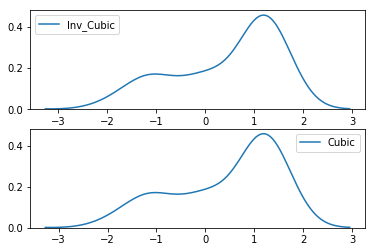

In [48]:
plt.subplot(211)
sns.kdeplot(Data.Inv_Cubic)
plt.subplot(212)
sns.kdeplot(Data.Cubic)

In [46]:
Data

,Products,Volume,Turnover,Assessment,log10,Cubic,Inv_Cubic
0,Glade,1.513688,10,Right Data,0.180036,1.148186,1.148186
1,Febreze,-5.515225,20,Invalid Data,1.001320,-1.766801,-1.766801
2,Air Wick,-1.818258,30,Invalid Data,0.421030,-1.220539,-1.220539
3,Renuzit,1.655868,40,Right Data,0.219026,1.183065,1.183065
4,Great Value,1.518825,50,Right Data,0.181508,1.149483,1.149483
5,Unstopables,2.585590,60,Right Data,0.412560,1.372524,1.372524
6,719 Walnut,1.775921,70,Right Data,0.249424,1.210992,1.210992
7,Arm & Hammer,-1.117828,80,Invalid Data,0.091898,-1.037827,-1.037827
8,Punati,0.000000,90,Missing Data,-inf,-0.001949,0.000000
9,Yankee,0.000000,100,Missing Data,-inf,-0.001949,0.000000


Skew of Cubic: -0.7948205594888967
Skew of explog: nan
skew of Volume: -1.3805295881220825


C:\Anaconda\lib\site-packages\scipy\stats\stats.py:942: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - np.expand_dims(np.mean(a, axis), axis)


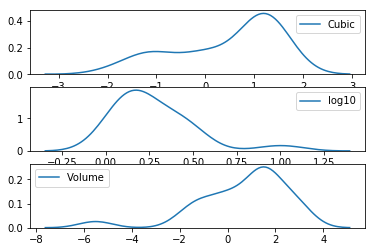

In [22]:
plt.subplot(311)
sns.kdeplot(Data.Cubic)
plt.subplot(312)
sns.kdeplot(Data['log10'])
plt.subplot(313)
sns.kdeplot(Data.Volume)


print('Skew of Cubic:',skew(Data.Cubic))
print('Skew of explog:', skew(Data['log10']))
print('skew of Volume:', skew(Data.Volume))

In [23]:
Data.describe()

,Volume,Turnover,log10,Cubic
count,22.000000,22.000000,22.000000,22.000000
mean,0.610165,73.636364,-inf,0.438363
std,1.958374,39.466134,NaN,1.050187
min,-5.515225,10.000000,-inf,-1.766801
25%,0.000000,42.500000,0.067067,-0.001949
50%,1.166989,70.000000,0.181508,1.052824
75%,1.655868,97.500000,0.371776,1.183065
max,3.000000,150.000000,1.001320,1.442250


## Boxcox

Import New dataset which will be relavent to BoxCox with not -ve values and zeros

In [10]:
box = pd.read_excel('Brand_Data.xlsx', sheetname = 'box_cox')

C:\Anaconda\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [11]:
box

,Products,Volume,Turnover,Assessment
0,Glade,1.513688,10,Right Data
1,Renuzit,1.655868,40,Right Data
2,Great Value,1.518825,50,Right Data
3,Unstopables,2.585590,60,Right Data
4,719 Walnut,1.775921,70,Right Data
5,Citrus Magic,1.119595,130,Right Data
6,Pure Citrus,2.121217,140,Right Data
7,California Scents,1.166989,150,Right Data
8,Ozium,1.655868,30,Right Data
9,Colgate,1.518825,40,Right Data


In [12]:
from scipy import stats
from scipy.special import boxcox, inv_boxcox
transform = np.asarray(box[['Volume']].values)
box['box_cox'] = stats.boxcox(transform)[0]

In [13]:
box

,Products,Volume,Turnover,Assessment,box_cox
0,Glade,1.513688,10,Right Data,0.375602
1,Renuzit,1.655868,40,Right Data,0.447482
2,Great Value,1.518825,50,Right Data,0.378372
3,Unstopables,2.585590,60,Right Data,0.761494
4,719 Walnut,1.775921,70,Right Data,0.501396
5,Citrus Magic,1.119595,130,Right Data,0.109934
6,Pure Citrus,2.121217,140,Right Data,0.630319
7,California Scents,1.166989,150,Right Data,0.148796
8,Ozium,1.655868,30,Right Data,0.447482
9,Colgate,1.518825,40,Right Data,0.378372


Skew for box_cox: 0.03472669082665318


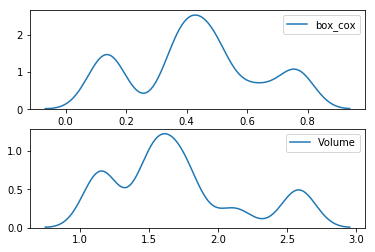

In [14]:
print('Skew for box_cox:', skew(box.box_cox))
plt.subplot(211)
sns.kdeplot(box.box_cox)
plt.subplot(212)
sns.kdeplot(box.Volume)
plt.show()
